# **Actividad**: Redes Neuronales - Selección de Atributos.

----------

**Librerías que utilizaremos:**
-  `numpy`, `matplotlib`
- `tensorflow`: Plataforma de código abierto para machine learning, fue desarrollada por Google.
- `keras` : Librería de código libre para redes neuronales en Python.

---

 **Descripción:**
- Las redes neuronales son un conjunto de algoritmos diseñados especialmente para reconocer patrones.

- Pueden resolver problemas que son fáciles para un humano, pero complejos para un algoritmo.

- Las redes neuronales intentan emular la forma en la que creemos funciona el cerebro humano.

- Éstas redes están constituídas por entidades llamadas **neuronas**.
- Las neuronas reciben datos de entrada de otras neuronas, los procesan, y producen datos de salida que envian a otras neuronas, con tantos niveles o capas como deseemos, hasta que la información llega a las últimas neuronas de la red, que muestran el resultado que buscamos.

- Cada conexión entre dos neuronas tiene un peso distinto. Al peso le llamamos w, del inglés weight.

- Los datos que llegan a cada neurona se pasan por una función matemática llamada de activación. Como lo que queremos es que la red sea capaz de resolver problemas cada vez más complejos, las funciones de activación generalmente harán que los modelos sean no lineales.



El dataset que usaremos es el de Fashion-MNIST, el cual consiste en un conjunto de 60.000 imágenes de prendas para entrenamiento y 10.000 para ejemplos de prueba.

Cada ejemplo es una imagen de 28X28 pixeles, en escala de grises, con una de 10 posibles etiquetas asignada.

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">

Para nuestra sesión usaremos las redes neuronales para predecir que tipo de prenda estamos viendo en la imagen.

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images)
print(train_labels)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[9 0 0 ... 3 0 5]


In [5]:
# Imagen expresada en colores por pixel rango 0-255
print(train_images[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

Al cargar el dataset regresa 4 arreglos NumPy.

Las etiquetas corresponden a los siguientes clases:

In [6]:
class_names = ['Camiseta / top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo',
                'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botines']
class_names

['Camiseta / top',
 'Pantalón',
 'Jersey',
 'Vestido',
 'Abrigo',
 'Sandalia',
 'Camisa',
 'Zapatilla',
 'Bolso',
 'Botines']

In [7]:
train_images.shape

(60000, 28, 28)

**Pre procesamiento de los datos**

Los datos deben ser pre procesados antes de entrenar la red.

Si inspeccionamos las imágenes veremos que los valores caen en el rango de 0 a 255.

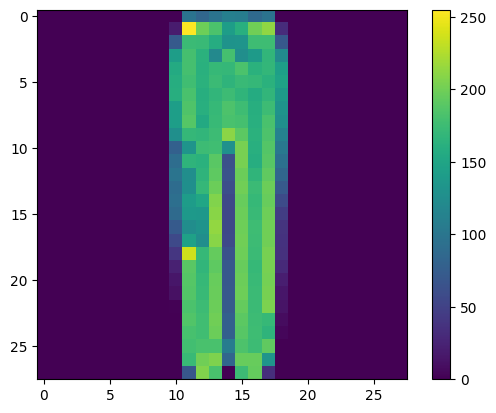

In [8]:
plt.figure()
plt.imshow(train_images[1000])
plt.colorbar()
plt.grid(False)
plt.show()


Necesitamos escalar los valores a un rango entre 0 y 1 antes de alimentar la red neuronal.

Es importante pre procesar ambos dataset, el de entrenamiento y pruebas.

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que los datos están etiquetados correctamente mostramos los primeros 25 ejemplos con sus etiquetas:

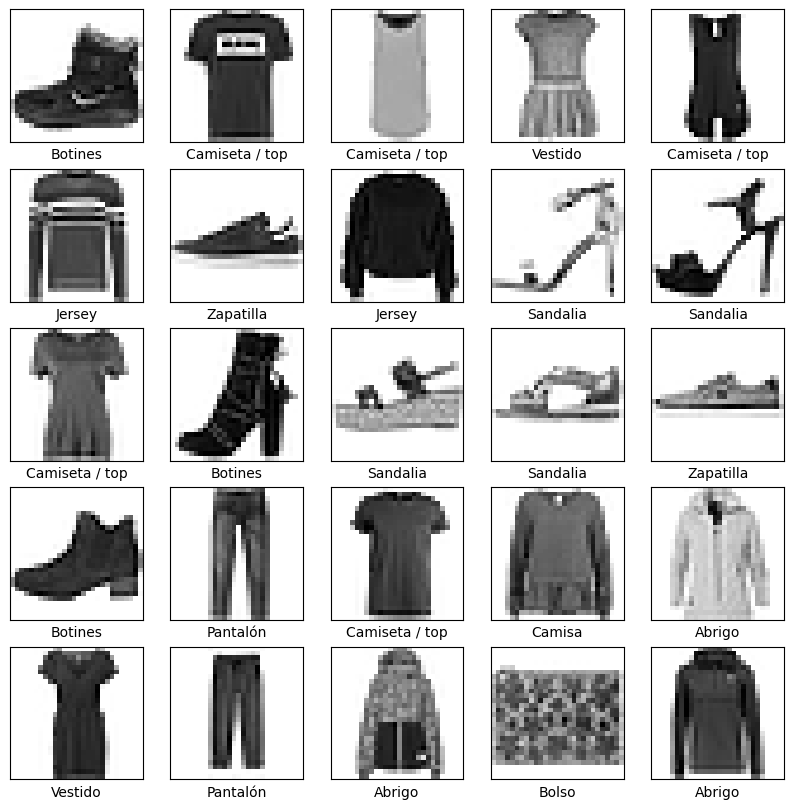

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


**Construir el modelo**

Construirlo requiere configurar sus capas y después compilarlo.

**Configurar las capas**

Las capas extraen representaciones de loos datos que las alimentaron.

La primer capa de la red, transforma el formato de la imagen de un arreglo de dos dimensiones (28X28) a un arreglo lineal de 784 elementos. Esta capa no aprende, solo da formato a los datos.

Después hay dos capas `tf.keras.layers.Dense`. La segunda, regresa un arreglo de longitud 10.





In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### Compilar el modelo

Hay algunos parámetros que tenemos que especificar antes de compilar el modelo:

* La función de pérdida (loss).

* Un Optimizador (optimizer).

* Un conjunto de métricas para medir el modelo (metrics).

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Entrenar el modelo**

Entrenar al modelo requiere los siguientes pasos:

1. Alimentar los datos de entrenamiento al modelo.
2. El modelo aprende a asociar imágenes y etiquetas.
3. Pedimos al modelo que realice predicciones sobre el dataset de pruebas.
4. Verificamos que las predicciones coincidan con las etiquetas en el arreglo de test_labels

**Alimentar al modelo**

Con 10 vueltas o pasos.


In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7867 - loss: 0.6251
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8625 - loss: 0.3836
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8790 - loss: 0.3351
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8871 - loss: 0.3082
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8923 - loss: 0.2923
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8977 - loss: 0.2778
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9033 - loss: 0.2619
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9051 - loss: 0.2546
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9095 - loss: 0.2441
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9128 - loss: 0.2341


In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 1s - 2ms/step - accuracy: 0.8899 - loss: 0.3186

Test accuracy: 0.8899000287055969

Test loss: 0.31861692667007446


In [22]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

### Hacer predicciones


In [23]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
predictions[1]

array([2.18105597e-05, 1.59819879e-12, 9.95221913e-01, 1.68007358e-10,
       3.87436314e-03, 4.41799809e-12, 8.82026739e-04, 4.91053053e-13,
       1.12989014e-10, 1.86642693e-14], dtype=float32)

In [29]:
np.argmax(predictions[2])

1

In [30]:
pos = test_labels[1]
class_names[pos]

'Jersey'

**Verificar predicciones**

In [31]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


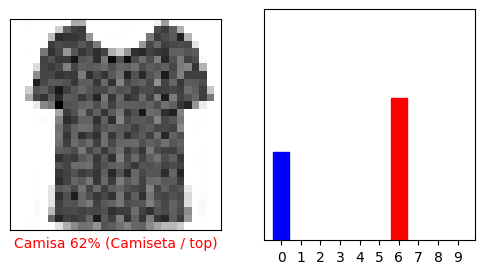

In [34]:
i = 1000 # representa la imagen de test_image
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


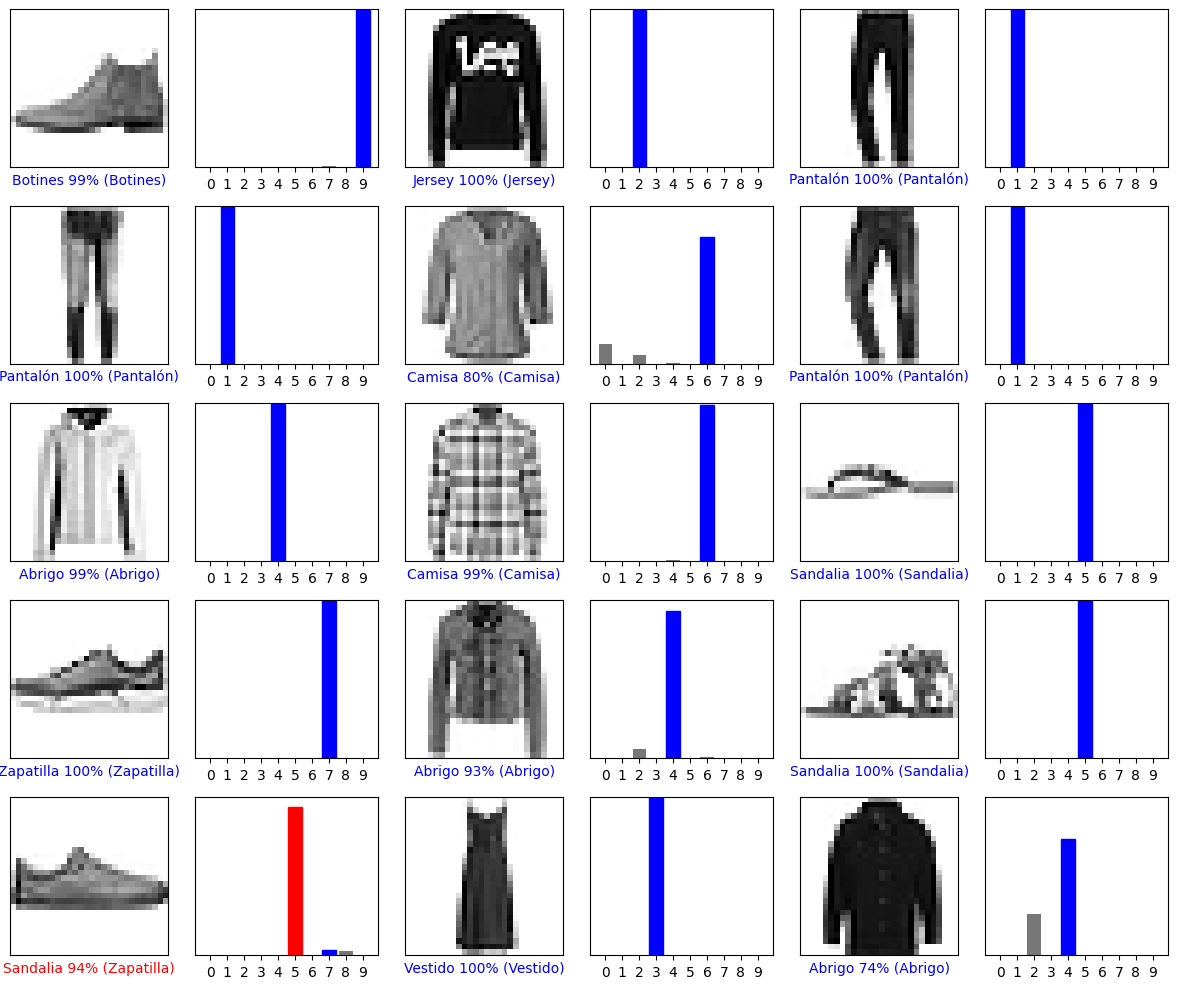

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
